In [1]:
import scanpy, numpy

In [2]:
%%time
input_file = '/home/adrian/scratch/zscore.tsv'
adata = scanpy.read_csv(input_file, delimiter='\t')
adata

CPU times: user 46.8 s, sys: 605 ms, total: 47.4 s
Wall time: 47.4 s


AnnData object with n_obs × n_vars = 46490 × 4385

In [3]:
scanpy.tl.pca(adata, n_comps=100)

In [4]:
nei = 9
dist = 0
spre = 1

/home/adrian/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


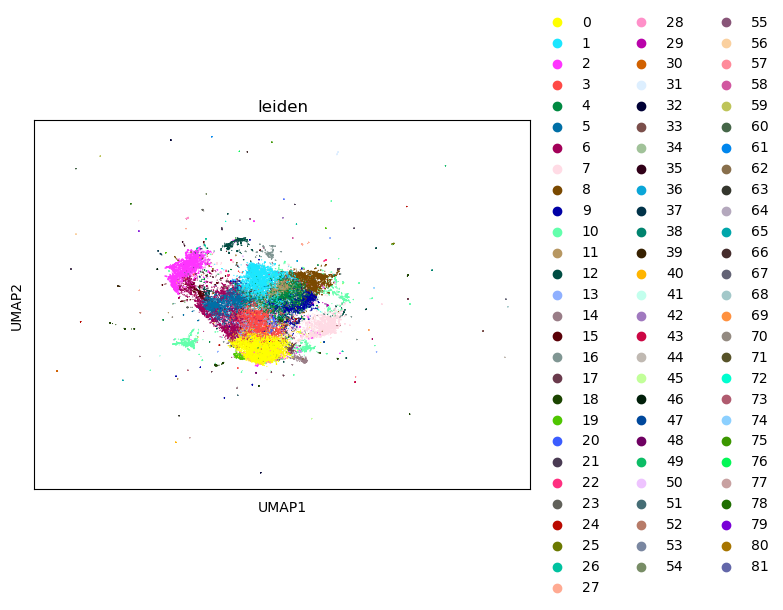

In [5]:
scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
scanpy.tl.umap(adata, min_dist=dist, spread=spre)
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'])

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


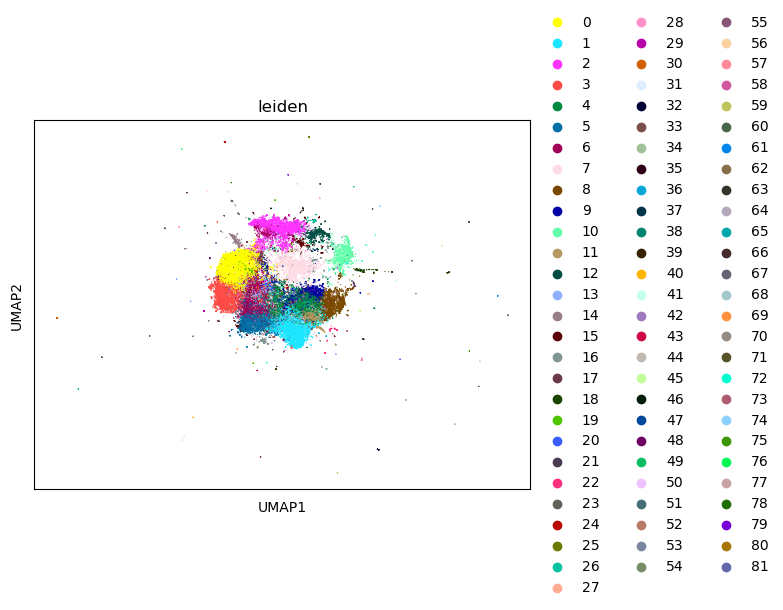

CPU times: user 28.1 s, sys: 47.8 ms, total: 28.2 s
Wall time: 28.2 s


In [6]:
%%time

scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)

scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'])

In [64]:
adata.obs

,leiden
ENST00000625998.2,11
ENST00000583693.5,1
ENST00000012134.6,5
ENST00000403263.5,9
ENST00000449352.6,3
...,...
ENST00000470412.5,12
ENST00000469534.1,7
ENST00000507412.1,10
ENST00000568351.1,4


In [74]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

In [85]:
adata.obs.index.get_loc(iso1)

25128

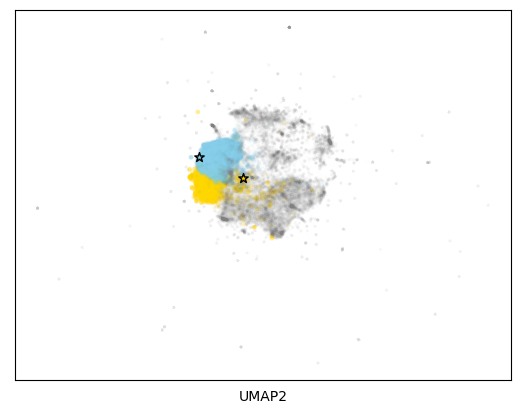

In [109]:
umap0 = adata.obsm['X_umap'][:, 0]
umap1 = adata.obsm['X_umap'][:, 1]

group1x = []; group1y = []
group2x = []; group2y = []
othersx = []; othersy = []

for i in range(len(adata.obs.index)):
    
    transcript = adata.obs.index[i]
    label = adata.obs.loc[transcript, 'leiden']
    x = adata.obsm['X_umap'][i, 0] 
    y = adata.obsm['X_umap'][i, 1]
    
    if label == adata.obs.loc[iso1, 'leiden']:
        group1x.append(x); group1y.append(y)
    elif label == adata.obs.loc[iso2, 'leiden']:
        group2x.append(x); group2y.append(y)
    else:
        othersx.append(x); othersy.append(y)

matplotlib.pyplot.scatter(group1x, group1y, s=10, c='gold', alpha=0.1, edgecolors='none')
matplotlib.pyplot.scatter(group2x, group2y, s=10, c='skyblue', alpha=0.1, edgecolors='none')
matplotlib.pyplot.scatter(othersx, othersy, s=5, c='gray', alpha=0.01, edgecolors='none')

# location of iso1 and iso2
position1 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso1), :]
position2 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso2), :]
matplotlib.pyplot.scatter(position1[0], position1[1], s=50, c='gold', edgecolors='black', marker='*')
matplotlib.pyplot.scatter(position2[0], position2[1], s=50, c='skyblue', marker='*', edgecolors='black')

matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.xlabel('UMAP2')
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])
matplotlib.pyplot.show()

In [89]:
print(position1)
print(position1[1])

[5.4789724 6.794127 ]
6.794127


In [18]:
import matplotlib